In [1]:
import warnings

warnings.simplefilter("ignore")

In [2]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as ssb



In [3]:
accidentes = pd.read_csv("C:/Users/sergi/modalidad/DataSet/Accidentalidad.csv",encoding='utf-8')

In [4]:
accidentes.head(5)

,X,Y,OBJECTID,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,DIRECCION_ENC,CBML,TIPO_GEOCOD,GRAVEDAD,BARRIO,COMUNA,DISENO,DIA_NOMBRE,MES,MES_NOMBRE
0,-75.578357,6.213719,673380,1642888.0,2018-09-20T00:00:00.000Z,02:10:00 p. m.,20,2018,Choque,CR 50 FF CL 9 AA,CR 050 FF 009 AA 000 00000,1507,Malla vial aproximada: CR 50-10,HERIDO,Campo Amor,Guayabal,Tramo de via,JUEVES,9,SEPTIEMBRE
1,-75.592022,6.279157,557526,1620950.0,2018-03-21T00:00:00.000Z,08:30 PM,21,2018,Atropello,CL 76 AE CR 83,CL 076 AE 083 000 00000,0715,Malla vial,HERIDO,Villa Flora,Robledo,Tramo de via,MIÉRCOLES,3,MARZO
2,-75.595882,6.275555,674912,1640270.0,2018-08-30T00:00:00.000Z,09:20:00 p. m.,30,2018,Choque,CR 85 CL 65,CR 085 065 000 00000,0717,Malla vial,SOLO DAÑOS,Robledo,Robledo,Interseccion,JUEVES,8,AGOSTO
3,-75.567284,6.248271,674286,1641770.0,2018-09-10T00:00:00.000Z,08:50:00 a. m.,10,2018,Choque,CL 49 A CR 49,CL 049 A 049 000 00000,1019,Malla vial aproximada: CL 49-49,SOLO DAÑOS,La Candelaria,La Candelaria,Interseccion,LUNES,9,SEPTIEMBRE
4,-75.576195,6.213677,681701,1645768.0,2018-10-12T00:00:00.000Z,06:18:00 p. m.,12,2018,Choque,CR 48 DD CL 9,CR 048 DD 009 000 00000,1419,Malla vial aproximada: CR 48-10,SOLO DAÑOS,Manila,El Poblado,Tramo de via,VIERNES,10,OCTUBRE


In [5]:
accidentes.shape

(35619, 20)

Cambiamos el nombre de la columna DIA_NOMBRE por DIA_NUMERO

In [6]:
accidentes = accidentes.rename(columns={'DIA_NOMBRE':'DIA_SEMANA'})


Cambiando los valores de las columna DIA_NOMBRE por los dias numericos de la semana 1:7

In [7]:
accidentes.DIA_SEMANA = accidentes.DIA_SEMANA.str.replace('LUNES','1')
accidentes.DIA_SEMANA = accidentes.DIA_SEMANA.str.replace('MARTES', '2')
accidentes.DIA_SEMANA = accidentes.DIA_SEMANA.str.replace('MIÉRCOLES', '3')
accidentes.DIA_SEMANA = accidentes.DIA_SEMANA.str.replace('JUEVES', '4')
accidentes.DIA_SEMANA = accidentes.DIA_SEMANA.str.replace('VIERNES', '5')
accidentes.DIA_SEMANA = accidentes.DIA_SEMANA.str.replace('SÁBADO', '6')
accidentes.DIA_SEMANA = accidentes.DIA_SEMANA.str.replace('DOMINGO', '7')

In [8]:
accidentes['NUM_COMUNA'] = accidentes['COMUNA']

Cambiamos los valores de la columna COMUNA y los pasamos por su representación numerica

Nota importante : a los corregimientos tambien se le asignaron un numero, despues del 17

In [9]:
accidentes.NUM_COMUNA = accidentes.NUM_COMUNA.replace({"Popular":1, "Santa Cruz":2, "Manrique": 3 , "Aranjuez":4, "Castilla":5,
                                               "Doce de Octubre":6, "Robledo":7, "Villa Hermosa":8, "Buenos Aires":9,
                                               "La Candelaria": 10, "Laureles Estadio": 11, "La América":12, "San Javier": 13,
                                              "El Poblado": 14, "Guayabal":15, "Belén":16 , "Corregimiento de Santa Elena":17,
                                              "Corregimiento de Altavista":18, "Corregimiento de San Sebastián de Palmitas":19,
                                              "Corregimiento de San Antonio de Prado":20, "Corregimiento de San Cristóbal":21})

In [10]:
accidentes['NUM_GRAVEDAD'] = accidentes['GRAVEDAD']

print(f'Cambiamos los valores de la columna GRAVEDAD donde\n')
print(f'1 = HERIDO\n2 = SOLO DAÑOS\n3 = MUERTO')



Cambiamos los valores de la columna GRAVEDAD donde

1 = HERIDO
2 = SOLO DAÑOS
3 = MUERTO


In [11]:
accidentes['NUM_GRAVEDAD'].value_counts()

HERIDO        18773
SOLO DAÑOS    16622
MUERTO          224
Name: NUM_GRAVEDAD, dtype: int64

In [12]:
accidentes.NUM_GRAVEDAD = accidentes.NUM_GRAVEDAD.replace({"HERIDO":1,"SOLO DAÑOS":2,"MUERTO":3,})

In [13]:
accidentes['NUM_DISENO'] = accidentes['DISENO']

print(f'Cambiamos los valores de la columna DISENO donde\n')
print(f'1 = Tramo de via\n2 = Interseccion\n3 = Lote o Predio\n4 = Glorieta\n5 = Paso Inferior\n6 = Paso Elevado\n7 = Puente\n8 = Ciclo Ruta\n9 = Paso a Nivel\n10 = Via peatonal\n11 = Tunel\n12 = Pontón')



Cambiamos los valores de la columna DISENO donde

1 = Tramo de via
2 = Interseccion
3 = Lote o Predio
4 = Glorieta
5 = Paso Inferior
6 = Paso Elevado
7 = Puente
8 = Ciclo Ruta
9 = Paso a Nivel
10 = Via peatonal
11 = Tunel
12 = Pontón


In [14]:
accidentes.NUM_DISENO = accidentes.NUM_DISENO.replace({"Tramo de via":1,"Interseccion":2,"Lote o Predio":3,"Glorieta":4,"Paso Inferior":5,"Paso Elevado":6,"Puente":7,"Ciclo Ruta":8,"Paso a Nivel":9,"Via peatonal":10,"Tunel":11,"Pontón":12})

In [15]:
accidentes['CLASE'].unique()

array(['Choque', 'Atropello', 'Volcamiento', 'Otro', 'Caida Ocupante',
       'Caída Ocupante', 'Incendio'], dtype=object)

In [16]:
accidentes['NUM_CLASE'] = accidentes['CLASE']


print(f'Cambiamos los valores de la columna CLASE donde\n')
print(f'1 = Choque\n2 = Atropello\n3 = Volcamiento\n4 = Caida Ocupante\n5 = Incendio\n6 = Otro\n')


Cambiamos los valores de la columna CLASE donde

1 = Choque
2 = Atropello
3 = Volcamiento
4 = Caida Ocupante
5 = Incendio
6 = Otro



In [17]:
accidentes.NUM_CLASE = accidentes.NUM_CLASE.replace({"Choque":1,"Atropello":2,"Volcamiento":3,"Caida Ocupante":4,"Incendio":5,"Otro":6})

Eliminamos las filas que contenian datos vacios, para contar con la misma dimension de los mismos

In [18]:
#Eliminamos las filas de las columnas que no tienen información   
accidentes = accidentes.drop(accidentes[accidentes['COMUNA']=='Sin Inf'].index)

accidentes.drop(accidentes[accidentes.CBML.isnull()].index, inplace = True)
accidentes.drop(accidentes[accidentes.BARRIO.isnull()].index, inplace = True)
accidentes.drop(accidentes[accidentes.COMUNA.isnull()].index, inplace = True)
accidentes.drop(accidentes[accidentes.DISENO.isnull()].index, inplace = True)

accidentes.shape

(35472, 24)

In [19]:
accidentes.head(5)

,X,Y,OBJECTID,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,...,BARRIO,COMUNA,DISENO,DIA_SEMANA,MES,MES_NOMBRE,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE
0,-75.578357,6.213719,673380,1642888.0,2018-09-20T00:00:00.000Z,02:10:00 p. m.,20,2018,Choque,CR 50 FF CL 9 AA,...,Campo Amor,Guayabal,Tramo de via,4,9,SEPTIEMBRE,15,1,1.0,1
1,-75.592022,6.279157,557526,1620950.0,2018-03-21T00:00:00.000Z,08:30 PM,21,2018,Atropello,CL 76 AE CR 83,...,Villa Flora,Robledo,Tramo de via,3,3,MARZO,7,1,1.0,2
2,-75.595882,6.275555,674912,1640270.0,2018-08-30T00:00:00.000Z,09:20:00 p. m.,30,2018,Choque,CR 85 CL 65,...,Robledo,Robledo,Interseccion,4,8,AGOSTO,7,2,2.0,1
3,-75.567284,6.248271,674286,1641770.0,2018-09-10T00:00:00.000Z,08:50:00 a. m.,10,2018,Choque,CL 49 A CR 49,...,La Candelaria,La Candelaria,Interseccion,1,9,SEPTIEMBRE,10,2,2.0,1
4,-75.576195,6.213677,681701,1645768.0,2018-10-12T00:00:00.000Z,06:18:00 p. m.,12,2018,Choque,CR 48 DD CL 9,...,Manila,El Poblado,Tramo de via,5,10,OCTUBRE,14,2,1.0,1


In [21]:
accidentes['NUM_COMUNA'].unique()

array([15, 7, 10, 14, 12, 3, 9, 11, 8, 20, 4, 16, 5, 21, 2, 6, 1, 17, 13,
       18], dtype=object)

cambiamos el tipo de dato de Object a int en las columnas DIA_NUMERO,CBML,NUM_COMUNA

In [22]:
accidentes[['DIA_SEMANA','CBML','NUM_DISENO','NUM_CLASE','NUM_GRAVEDAD','NUM_COMUNA']] = accidentes[['DIA_SEMANA','CBML','NUM_DISENO','NUM_CLASE','NUM_GRAVEDAD','NUM_COMUNA']].astype('int64')



In [24]:
accidentes.columns

Index(['X', 'Y', 'OBJECTID', 'RADICADO', 'FECHA', 'HORA', 'DIA', 'PERIODO',
       'CLASE', 'DIRECCION', 'DIRECCION_ENC', 'CBML', 'TIPO_GEOCOD',
       'GRAVEDAD', 'BARRIO', 'COMUNA', 'DISENO', 'DIA_SEMANA', 'MES',
       'MES_NOMBRE', 'NUM_COMUNA', 'NUM_GRAVEDAD', 'NUM_DISENO', 'NUM_CLASE'],
      dtype='object')

In [25]:
accidentes.shape

(35472, 24)

In [26]:
linea = accidentes.loc[10,:]
linea

X                                -75.6028
Y                                   6.241
OBJECTID                           685200
RADICADO                      1.65139e+06
FECHA            2018-11-27T00:00:00.000Z
HORA                       11:50:00 a. m.
DIA                                    27
PERIODO                              2018
CLASE                              Choque
DIRECCION                     CR 81 CL 34
DIRECCION_ENC    CR  081   034  000 00000
CBML                                 1109
TIPO_GEOCOD                    Malla vial
GRAVEDAD                       SOLO DAÑOS
BARRIO                        Las Acacias
COMUNA                   Laureles Estadio
DISENO                       Tramo de via
DIA_SEMANA                              2
MES                                    11
MES_NOMBRE                      NOVIEMBRE
NUM_COMUNA                             11
NUM_GRAVEDAD                            2
NUM_DISENO                              1
NUM_CLASE                         

# Inspeccionar nuestros datos

In [27]:
accidentes.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 35472 entries, 0 to 35618
Data columns (total 24 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   X              35472 non-null  float64
 1   Y              35472 non-null  float64
 2   OBJECTID       35472 non-null  int64  
 3   RADICADO       35472 non-null  float64
 4   FECHA          35472 non-null  object 
 5   HORA           35472 non-null  object 
 6   DIA            35472 non-null  int64  
 7   PERIODO        35472 non-null  int64  
 8   CLASE          35472 non-null  object 
 9   DIRECCION      35472 non-null  object 
 10  DIRECCION_ENC  35472 non-null  object 
 11  CBML           35472 non-null  int64  
 12  TIPO_GEOCOD    35472 non-null  object 
 13  GRAVEDAD       35472 non-null  object 
 14  BARRIO         35472 non-null  object 
 15  COMUNA         35472 non-null  object 
 16  DISENO         35472 non-null  object 
 17  DIA_SEMANA     35472 non-null  int64  
 18  MES   

Columnas numericas y columnas de texto



In [28]:
(accidentes.dtypes != object)


X                 True
Y                 True
OBJECTID          True
RADICADO          True
FECHA            False
HORA             False
DIA               True
PERIODO           True
CLASE            False
DIRECCION        False
DIRECCION_ENC    False
CBML              True
TIPO_GEOCOD      False
GRAVEDAD         False
BARRIO           False
COMUNA           False
DISENO           False
DIA_SEMANA        True
MES               True
MES_NOMBRE       False
NUM_COMUNA        True
NUM_GRAVEDAD      True
NUM_DISENO        True
NUM_CLASE         True
dtype: bool

In [29]:
accidentes.dtypes == object


X                False
Y                False
OBJECTID         False
RADICADO         False
FECHA             True
HORA              True
DIA              False
PERIODO          False
CLASE             True
DIRECCION         True
DIRECCION_ENC     True
CBML             False
TIPO_GEOCOD       True
GRAVEDAD          True
BARRIO            True
COMUNA            True
DISENO            True
DIA_SEMANA       False
MES              False
MES_NOMBRE        True
NUM_COMUNA       False
NUM_GRAVEDAD     False
NUM_DISENO       False
NUM_CLASE        False
dtype: bool

In [30]:
num = (accidentes.dtypes != object )
num.index

Index(['X', 'Y', 'OBJECTID', 'RADICADO', 'FECHA', 'HORA', 'DIA', 'PERIODO',
       'CLASE', 'DIRECCION', 'DIRECCION_ENC', 'CBML', 'TIPO_GEOCOD',
       'GRAVEDAD', 'BARRIO', 'COMUNA', 'DISENO', 'DIA_SEMANA', 'MES',
       'MES_NOMBRE', 'NUM_COMUNA', 'NUM_GRAVEDAD', 'NUM_DISENO', 'NUM_CLASE'],
      dtype='object')

In [31]:
for i in num.index:
    print(i)

X
Y
OBJECTID
RADICADO
FECHA
HORA
DIA
PERIODO
CLASE
DIRECCION
DIRECCION_ENC
CBML
TIPO_GEOCOD
GRAVEDAD
BARRIO
COMUNA
DISENO
DIA_SEMANA
MES
MES_NOMBRE
NUM_COMUNA
NUM_GRAVEDAD
NUM_DISENO
NUM_CLASE


In [32]:
num_cols = [c for c in num.index if num[c]]

In [33]:
num_cols

['X',
 'Y',
 'OBJECTID',
 'RADICADO',
 'DIA',
 'PERIODO',
 'CBML',
 'DIA_SEMANA',
 'MES',
 'NUM_COMUNA',
 'NUM_GRAVEDAD',
 'NUM_DISENO',
 'NUM_CLASE']

In [34]:
accidentes.dtypes == object

X                False
Y                False
OBJECTID         False
RADICADO         False
FECHA             True
HORA              True
DIA              False
PERIODO          False
CLASE             True
DIRECCION         True
DIRECCION_ENC     True
CBML             False
TIPO_GEOCOD       True
GRAVEDAD          True
BARRIO            True
COMUNA            True
DISENO            True
DIA_SEMANA       False
MES              False
MES_NOMBRE        True
NUM_COMUNA       False
NUM_GRAVEDAD     False
NUM_DISENO       False
NUM_CLASE        False
dtype: bool

In [35]:
obj = (accidentes.dtypes == object)
obj_cols =  [c for c in obj.index if obj[c]]

In [36]:
obj_cols

['FECHA',
 'HORA',
 'CLASE',
 'DIRECCION',
 'DIRECCION_ENC',
 'TIPO_GEOCOD',
 'GRAVEDAD',
 'BARRIO',
 'COMUNA',
 'DISENO',
 'MES_NOMBRE']

In [37]:
accidentes_num = accidentes[num_cols]
accidentes_obj = accidentes[obj_cols]

In [38]:
accidentes_obj.to_csv("C:/Users/sergi/modalidad/Dataset/accidentes_obj.csv",index = False)

# Estadisticas de las columnas

In [39]:
accidentes_num.describe()

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,CBML,DIA_SEMANA,MES,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE
count,35472.000000,35472.000000,35472.000000,3.547200e+04,35472.000000,35472.000000,3.547200e+04,35472.000000,35472.000000,35472.000000,35472.000000,35472.000000,35472.000000
mean,-75.576881,6.250349,669641.569802,1.650399e+06,15.597457,2018.435019,4.046737e+06,3.817715,6.000056,9.908068,1.475276,1.697931,1.896594
std,0.019220,0.028612,65480.319456,2.245319e+04,8.672317,0.495766,1.598018e+08,1.906274,3.144029,4.313859,0.506570,1.141486,1.615666
min,-75.684655,6.167769,549559.000000,1.611518e+06,1.000000,2018.000000,1.000000e+01,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,-75.586115,6.231943,662493.750000,1.630931e+06,8.000000,2018.000000,7.010000e+02,2.000000,3.000000,7.000000,1.000000,1.000000,1.000000
50%,-75.574644,6.250105,681557.500000,1.650214e+06,16.000000,2018.000000,1.013000e+03,4.000000,6.000000,10.000000,1.000000,1.000000,1.000000
75%,-75.564945,6.271571,722916.750000,1.669899e+06,23.000000,2019.000000,1.403000e+03,5.000000,8.000000,14.000000,2.000000,2.000000,2.000000
max,-75.504666,6.312059,742350.000000,1.689537e+06,31.000000,2019.000000,9.140040e+09,7.000000,12.000000,21.000000,3.000000,12.000000,6.000000


# Observando los datos con graficos

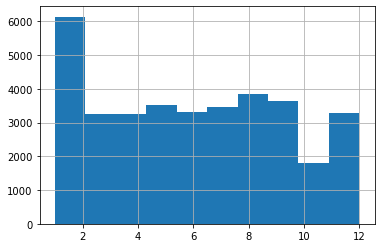

In [41]:
accidentes_num['MES'].hist()

In [42]:
accidentes_num['MES'].unique()

array([ 9,  3,  8, 10, 12,  1, 11,  4,  5,  6,  7,  2], dtype=int64)

In [43]:



for i in range(12):
       
    meses = (accidentes_num['MES'] == i+1 ).value_counts()
    print(f'mes {i}\n {meses}\n ')
           


mes 0
 False    32520
True      2952
Name: MES, dtype: int64
 
mes 1
 False    32287
True      3185
Name: MES, dtype: int64
 
mes 2
 False    32225
True      3247
Name: MES, dtype: int64
 
mes 3
 False    32226
True      3246
Name: MES, dtype: int64
 
mes 4
 False    31958
True      3514
Name: MES, dtype: int64
 
mes 5
 False    32169
True      3303
Name: MES, dtype: int64
 
mes 6
 False    31998
True      3474
Name: MES, dtype: int64
 
mes 7
 False    31611
True      3861
Name: MES, dtype: int64
 
mes 8
 False    31846
True      3626
Name: MES, dtype: int64
 
mes 9
 False    33677
True      1795
Name: MES, dtype: int64
 
mes 10
 False    33853
True      1619
Name: MES, dtype: int64
 
mes 11
 False    33822
True      1650
Name: MES, dtype: int64
 


In [44]:
accidentes.shape

(35472, 24)

# Buscando datos faltantes (nulos o NaN)

In [45]:
accidentes_num.notnull().apply(pd.Series.value_counts)

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,CBML,DIA_SEMANA,MES,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE
True,35472,35472,35472,35472,35472,35472,35472,35472,35472,35472,35472,35472,35472


In [46]:
(accidentes_num != 0).apply(pd.Series.value_counts)

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,CBML,DIA_SEMANA,MES,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE
True,35472,35472,35472,35472,35472,35472,35472,35472,35472,35472,35472,35472,35472


In [47]:
from sklearn.impute import SimpleImputer as Imputer
imputer = Imputer(missing_values=np.nan, strategy='mean')

In [48]:
values = imputer.fit_transform(accidentes_num)

In [49]:
#Array numpy

accidentes_num.values


array([[-7.55783574e+01,  6.21371873e+00,  6.73380000e+05, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [-7.55920223e+01,  6.27915720e+00,  5.57526000e+05, ...,
         1.00000000e+00,  1.00000000e+00,  2.00000000e+00],
       [-7.55958815e+01,  6.27555463e+00,  6.74912000e+05, ...,
         2.00000000e+00,  2.00000000e+00,  1.00000000e+00],
       ...,
       [-7.55638145e+01,  6.30139203e+00,  7.40535000e+05, ...,
         1.00000000e+00,  1.00000000e+00,  1.00000000e+00],
       [-7.55666172e+01,  6.24324978e+00,  7.11309000e+05, ...,
         1.00000000e+00,  1.00000000e+00,  6.00000000e+00],
       [-7.55591893e+01,  6.24096269e+00,  7.20466000e+05, ...,
         1.00000000e+00,  2.00000000e+00,  1.00000000e+00]])

In [51]:
x = pd.DataFrame(values)

In [52]:
x.columns = accidentes_num.columns

In [53]:
x.index = accidentes_num.index

In [55]:
x.head()

,X,Y,OBJECTID,RADICADO,DIA,PERIODO,CBML,DIA_SEMANA,MES,NUM_COMUNA,NUM_GRAVEDAD,NUM_DISENO,NUM_CLASE
0,-75.578357,6.213719,673380.0,1642888.0,20.0,2018.0,1507.0,4.0,9.0,15.0,1.0,1.0,1.0
1,-75.592022,6.279157,557526.0,1620950.0,21.0,2018.0,715.0,3.0,3.0,7.0,1.0,1.0,2.0
2,-75.595882,6.275555,674912.0,1640270.0,30.0,2018.0,717.0,4.0,8.0,7.0,2.0,2.0,1.0
3,-75.567284,6.248271,674286.0,1641770.0,10.0,2018.0,1019.0,1.0,9.0,10.0,2.0,2.0,1.0
4,-75.576195,6.213677,681701.0,1645768.0,12.0,2018.0,1419.0,5.0,10.0,14.0,2.0,1.0,1.0


In [57]:
accidentes['NUM_GRAVEDAD'].unique()

array([1, 2, 3], dtype=int64)

In [58]:
x.to_csv("C:/Users/sergi/modalidad/Dataset/X.csv",index = False)